Tutorial - Part #4 - Image Subtraction
=====================

For image subtraction the package has a module called `propersubtract`, which implements a main `diff` function.


In [28]:
from copy import copy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

%matplotlib inline

In [2]:
from astropy.visualization import LinearStretch, LogStretch
from astropy.visualization import ZScaleInterval, MinMaxInterval
from astropy.visualization import ImageNormalize

In [3]:
import properimage.single_image as si
import properimage.propersubtract as ps

In [4]:
ref_path = './../../../data/aligned_eso085-030-004.fit'
new_path = './../../../data/aligned_eso085-030-005.fit'

To get the subtraction we need to run this function by using both paths for example:

In [5]:
result = ps.diff(ref=ref_path, new=new_path, align=False, iterative=False, beta=False)

Sources found = 84
stamps will be 15 x 15
Sources found = 83
stamps will be 15 x 15
(83, 83, 84)
Matching result::  IDs > 0. => 80
p=2, q=81
[8.41596204 8.42189838]
('Masked pixels: ', 175)
('Masked pixels: ', 180)
S_corr sigma_clipped_stats 
mean = -1.00860590569e-05, median = -3.56692269431e-06, std = 0.000276636902297

Subtraction performed in 35.6130931377 seconds




The result is a list of numpy arrays.

The arrays are in order: `D, P, Scorr, mask`

In [6]:
D = result[0]
P = result[1]
Scorr = result[2]
mask = result[3]

In [78]:
palette = copy(plt.cm.inferno)
palette.set_bad('g', alpha=1)
#palette.set_under('k', 1.0)
#palette.set_over('w', 1.0)

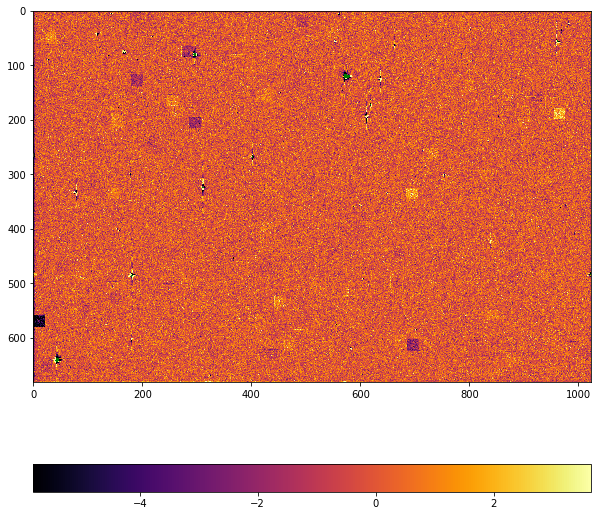

In [79]:
norm = ImageNormalize(D.real, interval=ZScaleInterval(),
                      stretch=LinearStretch())

plt.figure(figsize=(10, 10))
plt.imshow(np.ma.MaskedArray(D.real, mask=mask), 
           cmap=palette, norm=norm, interpolation='none')

plt.colorbar(orientation='horizontal')

In [80]:
D, P, Scorr, mask = ps.diff(ref=ref_path, new=new_path, align=False, iterative=False, beta=True)

Sources found = 84
stamps will be 15 x 15
Sources found = 83
stamps will be 15 x 15
(83, 83, 84)
Matching result::  IDs > 0. => 80
p=2, q=81
[8.41596204 8.42189838]
('Masked pixels: ', 175)
('Masked pixels: ', 180)
Found that beta = [ 1.01934751  0.07797221 -0.05996479]
Took only 37.1021509171 awesome seconds
The solution was with cost 0.0345686740607
S_corr sigma_clipped_stats 
mean = -1.44916022862e-05, median = -5.20717060784e-06, std = 0.00026342404167

Subtraction performed in 42.4541392326 seconds




The result is a list of numpy arrays.

The arrays are in order: `D, P, Scorr, mask`

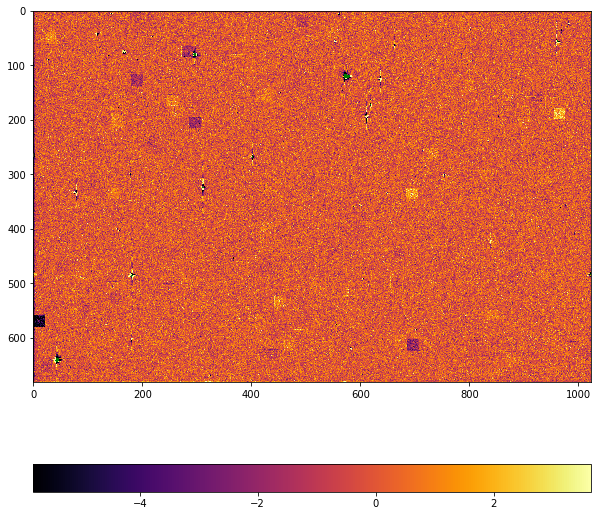

In [81]:
norm = ImageNormalize(D.real, interval=ZScaleInterval(),
                      stretch=LinearStretch())

plt.figure(figsize=(10, 10))
plt.imshow(np.ma.MaskedArray(D.real, mask=mask), 
           cmap=palette, norm=norm, interpolation='none')
plt.colorbar(orientation='horizontal')

We have the option of using the iterative methods without beta

In [82]:
D, P, Scorr, mask = ps.diff(ref=ref_path, new=new_path, align=False, iterative=True, beta=False)

Sources found = 84
stamps will be 15 x 15
Sources found = 83
stamps will be 15 x 15
(83, 83, 84)
Matching result::  IDs > 0. => 80
p=2, q=81
[8.41596204 8.42189838]
('Masked pixels: ', 175)
('Masked pixels: ', 180)
S_corr sigma_clipped_stats 
mean = -1.00860590569e-05, median = -3.56692269431e-06, std = 0.000276636902297

Subtraction performed in 8.50705480576 seconds




The result is a list of numpy arrays.

The arrays are in order: `D, P, Scorr, mask`

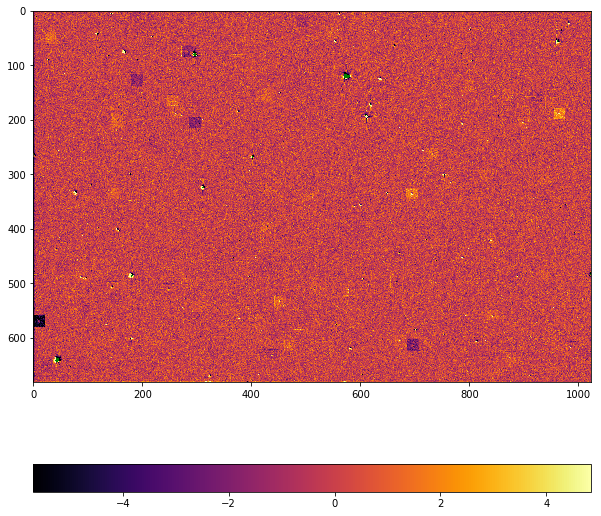

In [83]:
norm = ImageNormalize(D.real, interval=ZScaleInterval(),
                      stretch=LinearStretch())

plt.figure(figsize=(10, 10))
plt.imshow(np.ma.MaskedArray(D.real, mask=mask), 
           cmap=palette, norm=norm, interpolation='none')
plt.colorbar(orientation='horizontal')

We have the option of using the iterative methods without beta

In [ ]:
D, P, Scorr, mask = ps.diff(ref=ref_path, new=new_path, align=False, iterative=True, beta=True, shift=True)

Sources found = 84
stamps will be 15 x 15
Sources found = 83
stamps will be 15 x 15
(83, 83, 84)
Matching result::  IDs > 0. => 80
p=2, q=81
[8.41596204 8.42189838]
('Masked pixels: ', 175)
('Masked pixels: ', 180)
Found that beta = [ 1.01934751  0.07797221 -0.05996479]
Took only 46.3608419895 awesome seconds
The solution was with cost 0.0345686740607
S_corr sigma_clipped_stats 
mean = -1.44916022862e-05, median = -5.20717060784e-06, std = 0.00026342404167

Subtraction performed in 54.5472488403 seconds




The result is a list of numpy arrays.

The arrays are in order: `D, P, Scorr, mask`

In [ ]:
norm = ImageNormalize(D.real, interval=ZScaleInterval(),
                      stretch=LinearStretch())

plt.figure(figsize=(10, 10))
plt.imshow(np.ma.MaskedArray(D.real, mask=mask), 
           cmap=palette, norm=norm, interpolation='none')
plt.colorbar(orientation='horizontal')